#Eluvio Dataset Challenge (Databricks)

###Description of the data set
After inspecting the CSV file in Excel it can be inferred that time and date information, upvotes, downvotes, category, usernames and titles are posts in a website like reddit.

Imported the required packages for analysis. Imported the data set from google drive into databricks.

In [0]:
import pandas as pd
import numpy as np 
import seaborn as sns
sns.set()
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
%matplotlib inline
import string
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
from contextlib import contextmanager
import time
from geotext import GeoText
import re
from collections import Counter

In [0]:
%sh 
wget https://drive.google.com/u/0/uc?id=15X00ZWBjla7qGOIW33j8865QdF89IyAk&export=download

--2021-04-19 18:29:15-- https://drive.google.com/u/0/uc?id=15X00ZWBjla7qGOIW33j8865QdF89IyAk
Resolving drive.google.com (drive.google.com)... 216.58.217.46, 2607:f8b0:400a:805::200e
Connecting to drive.google.com (drive.google.com)|216.58.217.46|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-34-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lbhrbp5mejpc7nfobs74kgmrtd33vtha/1618856925000/14235685755320238486/*/15X00ZWBjla7qGOIW33j8865QdF89IyAk [following]
Warning: wildcards not supported in HTTP.
--2021-04-19 18:29:17-- https://doc-0g-34-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lbhrbp5mejpc7nfobs74kgmrtd33vtha/1618856925000/14235685755320238486/*/15X00ZWBjla7qGOIW33j8865QdF89IyAk
Resolving doc-0g-34-docs.googleusercontent.com (doc-0g-34-docs.googleusercontent.com)... 142.250.69.193, 2607:f8b0:400a:806::2001
Connecting to doc-0g-34-docs.googleusercontent.com (doc-0g-34-docs.googleusercontent.com)|142.250.69.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘uc?id=15X00ZWBjla7qGOIW33j8865QdF89IyAk.2’

 0K .......... .......... .......... .......... .......... 3.72M
 50K .......... .......... .......... .......... .......... 5.59M
 100K .......... .......... .......... .......... .......... 6.42M
 150K .......... .......... .......... .......... .......... 5.46M
 200K .......... .......... .......... .......... .......... 6.29M
 250K .......... .......... .......... .......... .......... 5.33M
 300K .......... .......... .......... .......... .......... 5.91M
 350K .......... .......... .......... .......... .......... 6.18M
 400K .......... .......... .......... .......... .......... 5.64M
 450K .......... .......... .......... .......... .......... 6.36M
 500K .......... .......... .......... .......... .......... 8.26M
 550K .......... .......... .......... .......... .......... 6.24M
 600K .......... .......... .......... .......... .......... 7.91M
 650K .......... .......... .......... .......... .......... 7.78M
 700K .......... .......... .......... .......... .......... 7.46M
 750K .......... .......... .......... .......... .......... 8.57M
 800K .......... .......... .......... .......... .......... 8.68M
 850K .......... .......... .......... .......... .......... 8.02M
 900K .......... .......... .......... .......... .......... 8.20M
 950K .......... .......... .......... .......... .......... 9.14M
 1000K .......... .......... .......... .......... .......... 9.98M
 1050K .......... .......... .......... .......... .......... 9.94M
 1100K .......... .......... .......... .......... .......... 6.17M
 1150K .......... .......... .......... .......... .......... 13.6M
 1200K .......... .......... .......... .......... .......... 9.53M
 1250K .......... .......... .......... .......... .......... 11.5M
 1300K .......... .......... .......... .......... .......... 9.35M
 1350K .......... .......... .......... .......... .......... 10.5M
 1400K .......... .......... .......... .......... .......... 11.8M
 1450K .......... .......... .......... .......... .......... 11.7M
 1500K .......... .......... .......... .......... .......... 8.08M
 1550K .......... .......... .......... .......... .......... 9.65M
 1600K .......... .......... .......... .......... .......... 13.2M
 1650K .......... .......... .......... .......... .......... 15.0M
 1700K .......... .......... .......... .......... .......... 9.08M
 1750K .......... .......... .......... .......... .......... 10.7M
 1800K .......... .......... .......... .......... .......... 13.3M
 1850K .......... .......... .......... .......... .......... 11.3M
 1900K .......... .......... .......... .......... .......... 9.60M
 1950K .......... .......... .......... .......... .......... 14.3M
 2000K .......... .......... .......... .......... .......... 11.2M
 2050K .......... .......... .......... 

In [0]:
df = pd.read_csv('uc?id=15X00ZWBjla7qGOIW33j8865QdF89IyAk')
display(df)
len(df)

time_created,date_created,up_votes,down_votes,title,over_18,author,category
1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,false,polar,worldnews
1201232075,2008-01-25,2,0,Japan resumes refuelling mission,false,polar,worldnews
1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,false,polar,worldnews
1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,false,fadi420,worldnews
1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,false,mhermans,worldnews
1201287889,2008-01-25,15,0,Hay presto! Farmer unveils the illegal mock-Tudor castle he tried to hide behind 40ft hay bales,false,Armagedonovich,worldnews
1201289438,2008-01-25,5,0,"Strikes, Protests and Gridlock at the Poland-Ukraine Border",false,Clythos,worldnews
1201536662,2008-01-28,0,0,The U.N. Mismanagement Program,false,Moldavite,worldnews
1201558396,2008-01-28,4,0,Nicolas Sarkozy threatens to sue Ryanair,false,Moldavite,worldnews
1201635869,2008-01-29,3,0,US plans for missile shields in Polish town met with resistance [video],false,JoeyRamone63,worldnews


Out[38]: 509236

Out[39]:

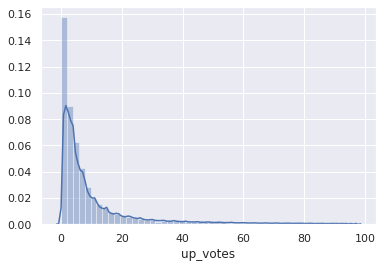

<matplotlib.axes._subplots.AxesSubplot at 0x7ffb98507d30>

In [0]:
sns.distplot(df[df['up_votes']<=97]['up_votes'])

New columns country, city and title length created from the existing column title. Also month, year and day columns are created from the time_created column.

In [0]:
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))
    
def countries(x):
    count = GeoText(x).countries
    city = GeoText(x).cities
    w = ''
    if not count and not city:
        return np.nan
    else:
        for country in count:
            w = w+' '+country
        for c in city:
            w = w+' '+c
        return w

def places(x):
    count = GeoText(x).countries
    city = GeoText(x).cities
    w = 0
    if not count and not city:
        return 0
    else:
        w=len(count)+len(city)
        return w

def df_feature_engineer(df):
    df['date_created'] = pd.to_datetime(df['date_created'])
    df['day_of_week']=df['date_created'].dt.day_name()
    df['day_of_week_num']=df['date_created'].dt.dayofweek
    df['year'] = df['date_created'].dt.year
    df['month'] = df['date_created'].dt.month
    df['day'] = df['date_created'].dt.day
    df['weekend'] = np.where(df['date_created'].dt.dayofweek>4, 1, 0)
    df['years_to_now'] = (datetime.today() - df['date_created']).dt.days/365
    # Unix tim starts at 00:00:00 Thursday, 1 January 1970
    df['time_created'] = pd.to_datetime(df['time_created'], unit='s')
    df['day_time']=df['time_created'].dt.hour+df['time_created'].dt.minute/60+df['time_created'].dt.second/3600
    df['author_total_posts'] = df['author'].groupby(df['author']).transform('count')
    df = df.drop(columns=['date_created','down_votes','category'])
    df['title_length'] = df['title'].str.split().apply(len)
    df['over_18'] = df['over_18'].map({False:0,True:1})
    df['countries'] = df['title'].apply(lambda x: countries(x))
    df['places'] = df['title'].apply(lambda x: places(x))
    return df 

In [0]:
df = df_feature_engineer(df)

In [0]:
df = df.sort_values(['time_created'], ascending=True)
df.head(1)

Out[42]:

,time_created,up_votes,title,over_18,author,day_of_week,day_of_week_num,year,month,day,weekend,years_to_now,day_time,author_total_posts,title_length,countries,places
0,2008-01-25 03:34:06,3,Scores killed in Pakistan clashes,0,polar,Friday,4,2008,1,25,0,13.241096,3.568333,50,5,Pakistan,1


Website users increasing from year to year and also it can be noticed that more average number of active users visit on the weekend.

Out[43]:

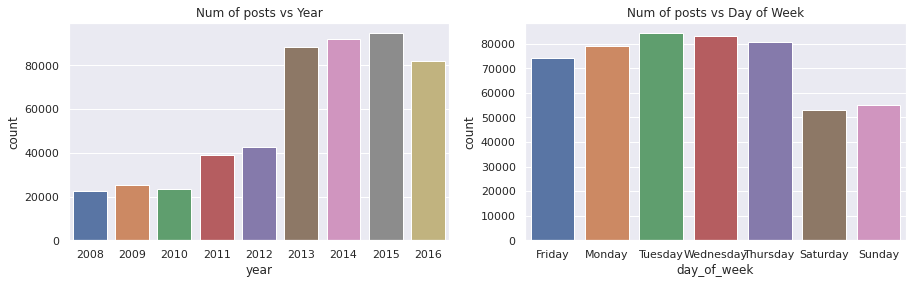

Text(0.5, 1.0, 'Num of posts vs Day of Week')

In [0]:
f, ax = plt.subplots(1, 2, figsize=(15, 4))
g=sns.countplot(x='year',data=df,ax=ax[0])
g.set_title('Num of posts vs Year')
g=sns.countplot(x='day_of_week',data=df,ax=ax[1])
g.set_title('Num of posts vs Day of Week')

Out[44]:

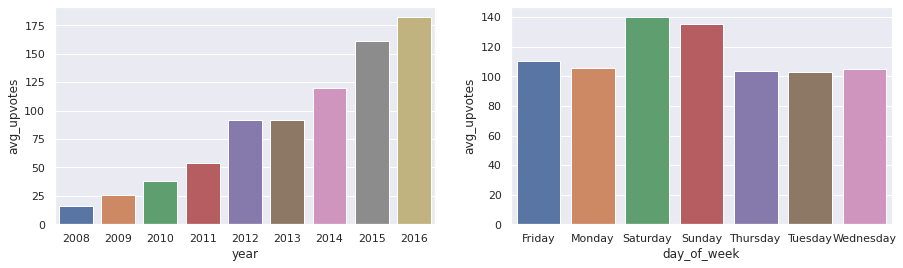

<matplotlib.axes._subplots.AxesSubplot at 0x7ffb8d43f3a0>

In [0]:
f, ax = plt.subplots(1, 2, figsize=(15, 4))
set1 = df.groupby('year').mean()['up_votes'].reset_index(name='avg_upvotes')
sns.barplot(x='year',y='avg_upvotes',data=set1, ax=ax[0])
set2 = df.groupby('day_of_week').mean()['up_votes'].reset_index(name='avg_upvotes')
sns.barplot(x='day_of_week',y='avg_upvotes',data=set2, ax=ax[1])

More posts are posted on the website at around 15:00.

Out[45]:

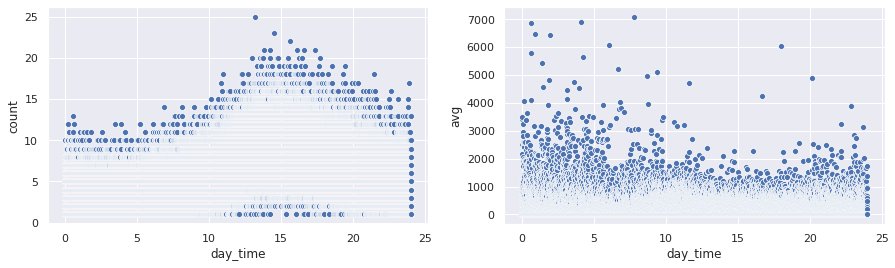

<matplotlib.axes._subplots.AxesSubplot at 0x7ffb8d32ad30>

In [0]:
f, ax = plt.subplots(1, 2, figsize=(15, 4))
set3 = df.groupby('day_time').count()['up_votes'].reset_index(name='count')
sns.scatterplot(x='day_time', y='count', data=set3, ax=ax[0])
set4 = df.groupby('day_time').mean()['up_votes'].reset_index(name='avg')
sns.scatterplot(x='day_time', y='avg', data=set4, ax=ax[1])

In [0]:
df[df['up_votes'] > 20000]

Out[46]:

,time_created,up_votes,title,over_18,author,day_of_week,day_of_week_num,year,month,day,weekend,years_to_now,day_time,author_total_posts,title_length,countries,places
377200,2015-06-20 16:41:11,21253,A biotech startup has managed to 3-D print fak...,0,KRISHNA53,Saturday,5,2015,6,20,1,5.835616,16.686389,109,49,NaN,0


although davidreiss666 has more articles posted than any other user but maxwellhill has more votes for his article.

Out[47]:

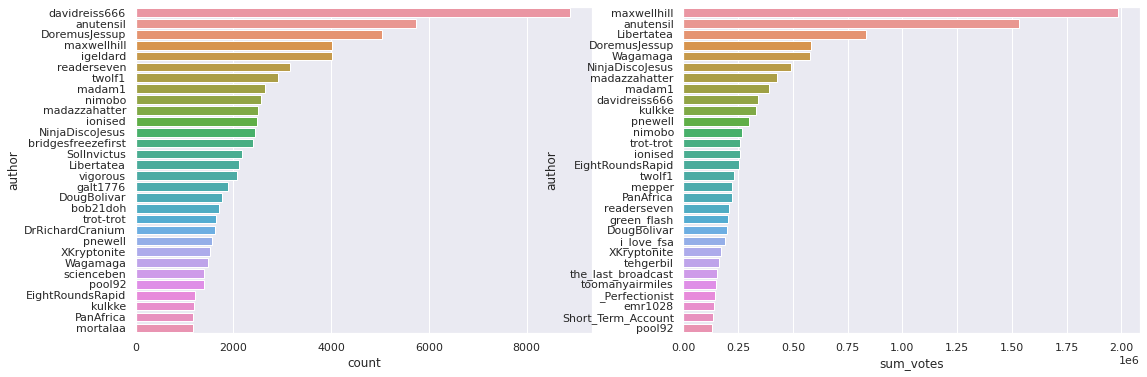

<matplotlib.axes._subplots.AxesSubplot at 0x7ffb8d2d5220>

In [0]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))
num = 30
sns.countplot(y=df['author'],\
              order = df['author'].value_counts().iloc[:num].index, ax=ax[0])

set5 = df.groupby('author').sum()['up_votes'].reset_index(name='sum_votes').\
       sort_values(by='sum_votes',ascending=False)
sns.barplot(y='author',x='sum_votes',data=set5.iloc[:num],ax=ax[1])

Out[48]:

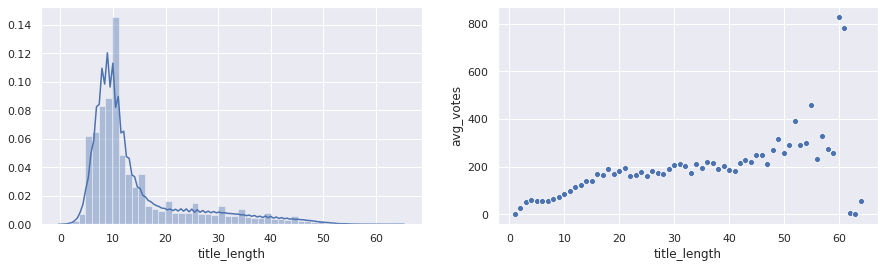

<matplotlib.axes._subplots.AxesSubplot at 0x7ffb8d0f1430>

In [0]:
f, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.distplot(df['title_length'],ax=ax[0])
set6 = df.groupby('title_length').mean()['up_votes'].reset_index(name='avg_votes')
sns.scatterplot(set6['title_length'],set6['avg_votes'],ax=ax[1])

As the length of title increases beyond 50, the average upvotes start declining. Ukraine has more news articles than any other country.

Out[49]:

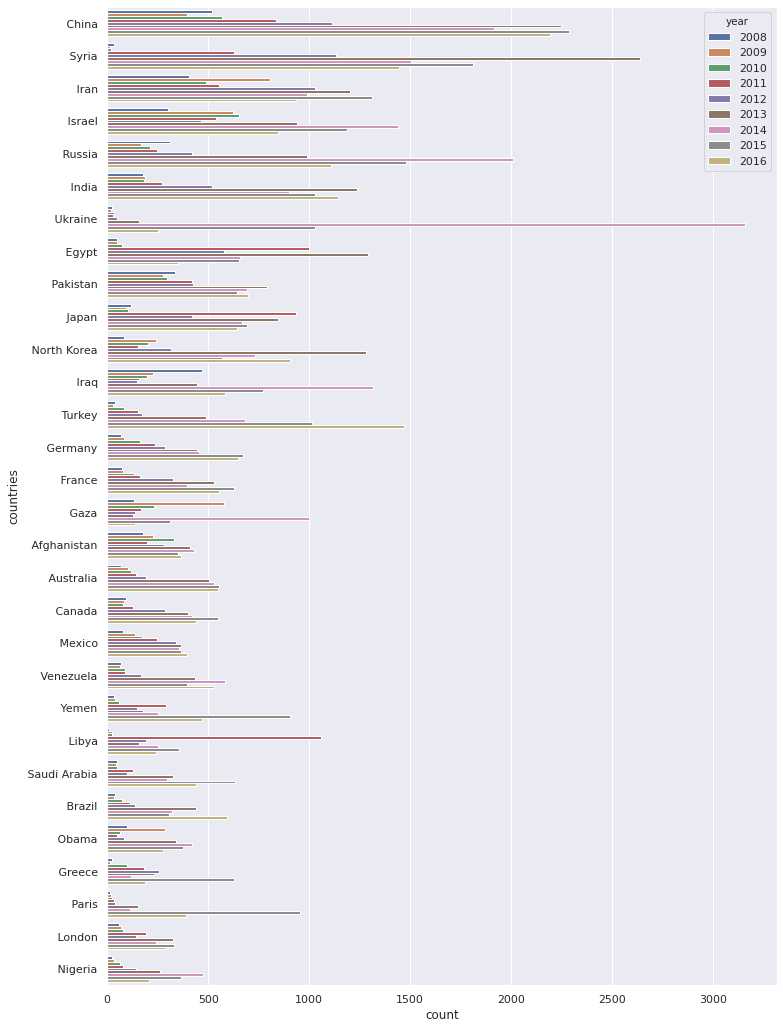

<matplotlib.axes._subplots.AxesSubplot at 0x7ffb8d187c10>

In [0]:
fig = plt.figure(figsize=(12,18))
num = 30
sns.countplot(y=df['countries'],\
              order = df['countries'].value_counts().iloc[:num].index, hue=df['year'])

Preprocessing the text data using nltk  package.

In [0]:
text = df['title']

from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from wordcloud import WordCloud
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

lemma=WordNetLemmatizer() 
stopwords_en = stopwords.words('english')

def text_process(text):
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", "", text)
    text = re.sub(r"U-turn", "Uturn", text)
    text = re.sub(r"New York Times", "NewYorkTimes", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"U of", "University of", text)
    text = re.sub(r"N Korea", "NorthKorea", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r"U S", "US", text)
    text = re.sub(r"U S ", "US", text)
    text = re.sub(r"U N", "UN", text)
    text = re.sub(r"U N ", "UN", text)
    text = re.sub(r"@\S+", "", text)

    word=nltk.word_tokenize(text.lower())
    new_word=[w for w in word if w not in stopwords_en and w.isalpha()]
    new_word=[lemma.lemmatize(w, "v") for w in new_word]
    return new_word

def word_freq(s):
    txt = s.str.lower().str.cat(sep=' ')  
    words = text_process(txt)
    words_dist = nltk.FreqDist(w for w in words) 
    return words_dist

def plot_cloud(words_dist,size):
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black').generate_from_frequencies(words_dist)
    fig = plt.figure(figsize=size, facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data] Unzipping tokenizers/punkt.zip.

In [0]:
print(text[382])
print(text_process(text[382]))

Turkey Has Entered Iraq
['turkey', 'enter', 'iraq']

In [0]:
for year in range(2008, 2017):
    words_dist=word_freq(df[df['year']==year]['title'])
    res=[]
    for w, count in words_dist.most_common(10):
        res.append(w)
    print(year, res)

2008 ['us', 'say', 'kill', 'china', 'war', 'world', 'attack', 'iraq', 'iran', 'new']
2009 ['us', 'israel', 'iran', 'say', 'gaza', 'kill', 'world', 'war', 'new', 'israeli']
2010 ['us', 'israel', 'say', 'kill', 'world', 'china', 'new', 'iran', 'war', 'attack']
2011 ['say', 'kill', 'us', 'protest', 'libya', 'egypt', 'new', 'china', 'government', 'force']
2012 ['say', 'kill', 'us', 'china', 'syria', 'iran', 'new', 'news', 'police', 'attack']
2013 ['say', 'us', 'syria', 'kill', 'china', 'new', 'attack', 'world', 'police', 'korea']
2014 ['say', 'us', 'ukraine', 'russia', 'kill', 'new', 'china', 'state', 'attack', 'russian']
2015 ['say', 'us', 'kill', 'china', 'attack', 'new', 'russia', 'state', 'isis', 'syria']
2016 ['say', 'us', 'china', 'kill', 'attack', 'new', 'syria', 'russia', 'state', 'police']

In [0]:
words_dist=word_freq(df['title'])
len(words_dist)
words_dist

Out[53]: FreqDist({'say': 45167, 'us': 39617, 'kill': 28756, 'china': 25755, 'new': 23329, 'attack': 21586, 'syria': 18785, 'russia': 18112, 'world': 17856, 'police': 16682, ...})

News articles are mostly about the attacks happening all around the world.

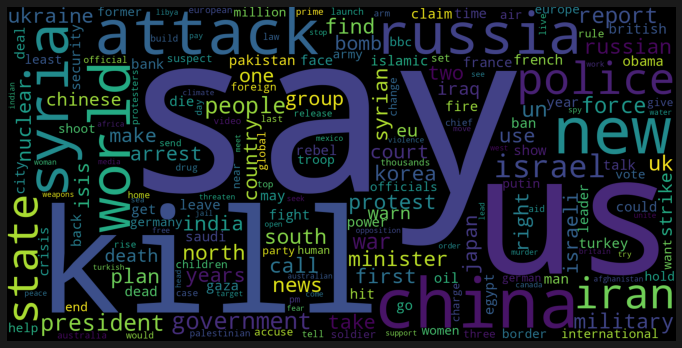

In [0]:
plot_cloud(words_dist,size = (15,5))

In [0]:
words_dist['bbc']

Out[55]: 5729

In [0]:
%sh
wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz 
gunzip GoogleNews-vectors-negative300.bin.gz -d GoogleNews-vectors-negative300.bin
rm GoogleNews-vectors-negative300.bin.gz

--2021-04-19 18:33:27-- https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.28.54
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.28.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

 0K .......... .......... .......... .......... .......... 0% 694K 38m38s
 50K .......... .......... .......... .......... .......... 0% 693K 38m40s
 100K .......... .......... .......... .......... .......... 0% 698K 38m34s
 150K .......... .......... .......... .......... .......... 0% 55.7M 29m2s
 200K .......... .......... .......... .......... .......... 0% 706K 30m50s
 250K .......... .......... .......... .......... .......... 0% 86.4M 25m44s
 300K .......... .......... .......... .......... .......... 0% 126M 22m6s
 350K .......... .......... .......... .......... .......... 0% 71.9M 19m23s
 400K .......... .......... .......... .......... .......... 0% 80.0M 17m16s
 450K .......... .......... .......... .......... .......... 0% 722K 19m15s
 500K .......... .......... .......... .......... .......... 0% 96.4M 17m31s
 550K .......... .......... .......... .......... .......... 0% 103M 16m5s
 600K .......... .......... .......... .......... .......... 0% 98.0M 14m52s
 650K .......... .......... .......... .......... .......... 0% 84.9M 13m49s
 700K .......... .......... .......... .......... .......... 0% 82.8M 12m55s
 750K .......... .......... .......... .......... .......... 0% 76.4M 12m8s
 800K .......... .......... .......... .......... .......... 0% 84.5M 11m26s
 850K .......... .......... .......... .......... .......... 0% 89.8M 10m49s
 900K .......... .......... .......... .......... .......... 0% 100M 10m16s
 950K .......... .......... .......... .......... .......... 0% 82.6M 9m46s
 1000K .......... .......... .......... .......... .......... 0% 750K 11m0s
 1050K .......... .......... .......... .......... .......... 0% 110M 10m31s
 1100K .......... .......... .......... .......... .......... 0% 109M 10m4s
 1150K .......... .......... .......... .......... .......... 0% 96.6M 9m39s
 1200K .......... .......... .......... .......... .......... 0% 85.2M 9m17s
 1250K .......... .......... .......... .......... .......... 0% 75.2M 8m56s
 1300K .......... .......... .......... .......... .......... 0% 95.0M 8m37s
 1350K .......... .......... .......... .......... .......... 0% 82.9M 8m19s
 1400K .......... .......... .......... .......... .......... 0% 92.7M 8m3s
 1450K .......... .......... .......... .......... .......... 0% 78.8M 7m47s
 1500K .......... .......... .......... .......... .......... 0% 149M 7m32s
 1550K .......... .......... .......... .......... .......... 0% 219M 7m19s
 1600K .......... .......... .......... .......... .......... 0% 95.1M 7m6s
 1650K .......... .......... .......... .......... .......... 0% 115M 6m54s
 1700K .......... .......... .......... .......... .......... 0% 117M 6m42s
 1750K .......... .......... .......... .......... .......... 0% 149M 6m31s
 1800K .......... .......... .......... .......... .......... 0% 123M 6m21s
 1850K .......... .......... .......... .......... .......... 0% 130M 6m11s
 1900K .......... .......... .......... .......... .......... 0% 139M 6m2s
 1950K .......... .......... .......... .......... .......... 0% 145M 5m53s
 2000K .......... .......... .......... .......... .......... 0% 787K 6m34s
 2050K .......... .......... .......... .......... .......... 0% 149M 6m25s
 2100K .......... .......... .......... .......... .......... 0% 145M 6m17s
 2150K .......... .......... .......... .......... .......... 0% 53.7M 6m9s
 2200K .......... .......... .......... .......... .......... 0% 124M 6m1s
 2250K .......... .......... .......... .......... .......... 0% 141M 5m53s
 2300K .......... .......... .......... .......... .......... 0% 115M 5m46s
 2350K .......... ......

In [0]:
%sh
ls /databricks/driver/GoogleNews-vectors-negative300.bin

/databricks/driver/GoogleNews-vectors-negative300.bin

In [0]:
from gensim.models import KeyedVectors  
wv_model = KeyedVectors.load_word2vec_format('file:///databricks/driver/GoogleNews-vectors-negative300.bin',binary=True)

In [0]:
def Word2Vec(wv_model, titles_list):
    big_title_string = ' '.join(titles_list)
    words = text_process(big_title_string)
    vector_list = [wv_model[word] for word in words if word in wv_model.key_to_index]
    words_filtered = [word for word in words if word in wv_model.key_to_index]
    word_vec_zip = zip(words_filtered, vector_list)
    word_vec_dict = dict(word_vec_zip)
    dic = pd.DataFrame.from_dict(word_vec_dict, orient='index')
    print('shape of dictionary',dic.shape)
    return dic

In [0]:
titles_list = [title for title in text]
dic = Word2Vec(wv_model, titles_list)

shape of dictionary (38313, 300)

Visualizing as clusters using t-SNE.

In [0]:
from sklearn.manifold import TSNE
from adjustText import adjust_text
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)
tsne_df = tsne.fit_transform(dic[0:400])

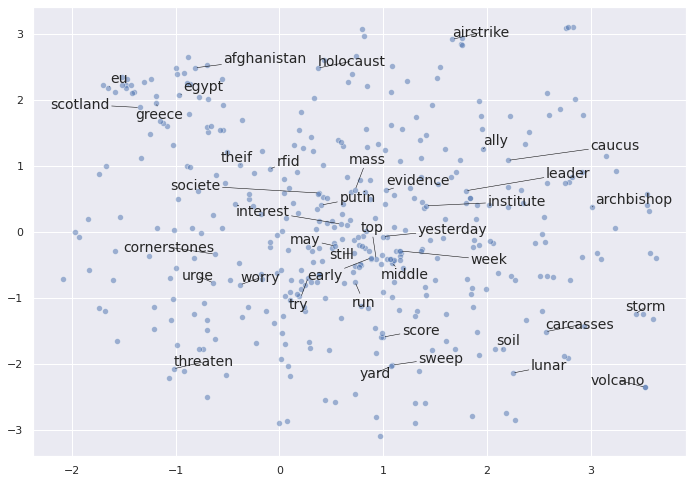

In [0]:
def plot_words(tsne_df, n):
    fig, ax = plt.subplots(figsize = (11.7, 8.27))
    sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

    texts = []
    words_to_plot = list(np.arange(0, 400, n))
    for word in words_to_plot:
        texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], dic.index[word], fontsize = 14))
    
    adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plot_words(tsne_df, 10)

In [0]:
class Doc2Vec:
    def __init__(self, wv_model, corpus):
        self.word2vec_model = wv_model
        self.corpus = corpus
    # Filter out documents
    def filter_docs(self, texts, condition_on_doc):
        number_of_docs = len(self.corpus)
        texts = [text for (text, doc) in zip(texts, self.corpus)
                 if condition_on_doc(doc)]
        corpus = [doc for doc in self.corpus if condition_on_doc(doc)]
        print("{} docs removed".format(number_of_docs - len(corpus)))
        return (corpus, texts)
    
    def has_vector_representation(self, doc):
        return not all(word not in self.word2vec_model.key_to_index for word in doc)
    
    def document_vector(self, doc):
        # remove out-of-vocabulary words
        doc = [word for word in doc if word in self.word2vec_model.key_to_index]
        return np.mean(self.word2vec_model[doc], axis=0)

In [0]:
corpus = df['title'].map(text_process)
temp = Doc2Vec(wv_model, corpus)
corpus, titles_left = temp.filter_docs(titles_list, lambda doc: temp.has_vector_representation(doc))
x = []
for doc in corpus: 
    x.append(temp.document_vector(doc))
docvec = np.array(x)

169 docs removed

In [0]:
print(np.shape(docvec))

(509067, 300)

In [0]:
df_concat = df[df['up_votes']<20000]

In [0]:
df_concat = df_concat[['title', 'over_18', 'day_of_week_num','year', 'month', 'day', \
      'weekend', 'years_to_now','day_time','author_total_posts','title_length','places','up_votes']]

In [0]:
df_w_vectors = pd.DataFrame(docvec)
df_w_vectors['title'] = titles_left
main = pd.concat((df_w_vectors, df_concat), axis=1)
main.dropna(axis=0, inplace=True)
main.head(1)

Out[84]:

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,title,title,over_18,day_of_week_num,year,month,day,weekend,years_to_now,day_time,author_total_posts,title_length,places,up_votes
0,-0.045776,0.086182,0.162781,0.033356,-0.012695,0.103027,0.002197,-0.133911,-0.05481,0.18335,-0.049713,-0.270142,-0.055603,0.130859,-0.092407,0.072205,-0.114746,0.111816,-0.006165,-0.157471,0.119263,-0.024414,0.170532,-0.053818,-0.076233,0.110626,-0.124817,-0.161011,0.007629,-0.083649,-0.135437,0.111767,-0.179321,-0.047241,-0.163696,0.163635,-0.129532,0.118958,0.070847,0.083527,...,0.082684,-0.090454,0.000488,-0.137451,-0.047852,0.017944,0.005096,0.036469,-0.076904,0.071594,-0.122314,-0.128113,0.02832,0.109131,0.040222,-0.064575,0.0,0.026855,-0.181274,0.09668,-0.165955,0.028076,-0.069458,-0.108643,-0.016647,0.120659,Scores killed in Pakistan clashes,Scores killed in Pakistan clashes,0.0,4.0,2008.0,1.0,25.0,0.0,13.241096,3.568333,50.0,5.0,1.0,3.0


Predicting the number of upvotes based on the content of headlines using linear regression

In [0]:
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def model_diagnostics(model, pr=True):
    y_predicted = model.predict(X_val)
    r2 = r2_score(y_val, y_predicted)
    mse = mean_squared_error(y_val, y_predicted)
    mae = mean_absolute_error(y_val, y_predicted)
    if pr:
        print(f"R-Sq: {r2:.4}")
        print(f"RMSE: {np.sqrt(mse)}")
        print(f"MAE: {mae}")

In [0]:
X=main.drop(columns=['up_votes','title'])
y=main['up_votes']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.1,random_state=101)

In [0]:
reg = LinearRegression().fit(X_train, y_train)
model_diagnostics(reg)

R-Sq: 0.01644
RMSE: 546.3215611637271
MAE: 188.89292652121625

In [0]:
lasso = LassoCV(cv=10).fit(X_train, y_train)
model_diagnostics(lasso)

R-Sq: 0.01658
RMSE: 546.2847446392902
MAE: 187.50645613707837

r2 is too low. Model is too weak to predict the upvotes.